In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the data
df = pd.read_excel('anscombes blog.xlsx')
print(df)

     X      Y  X.1   Y.1  X.2    Y.2  X.3    Y.3
0   10   8.04   10  9.14   10   7.46    8   6.58
1    8   6.95    8  8.14    8   6.77    8   5.76
2   13   7.58   13  8.74   13  12.74    8   7.71
3    9   8.81    9  8.77    9   7.11    8   8.84
4   11   8.33   11  9.26   11   7.81    8   8.47
5   14   9.96   14  8.10   14   8.84    8   7.04
6    6   7.24    6  6.13    6   6.08    8   5.25
7    4   4.26    4  3.10    4   5.39   19  12.50
8   12  10.84   12  9.13   12   8.15    8   5.56
9    7   4.82    7  7.26    7   6.42    8   7.91
10   5   5.68    5  4.74    5   5.73    8   6.89


     Dataset  Mean X    Mean Y  Var X     Var Y  Correlation     Slope  \
0  Dataset 1     9.0  7.500909   11.0  4.127269     0.816421  0.500091   
1  Dataset 2     9.0  7.500909   11.0  4.127629     0.816237  0.500000   
2  Dataset 3     9.0  7.500000   11.0  4.122620     0.816287  0.499727   
3  Dataset 4     9.0  7.500909   11.0  4.123249     0.816521  0.499909   

   Intercept  
0   3.000091  
1   3.000909  
2   3.002455  
3   3.001727  


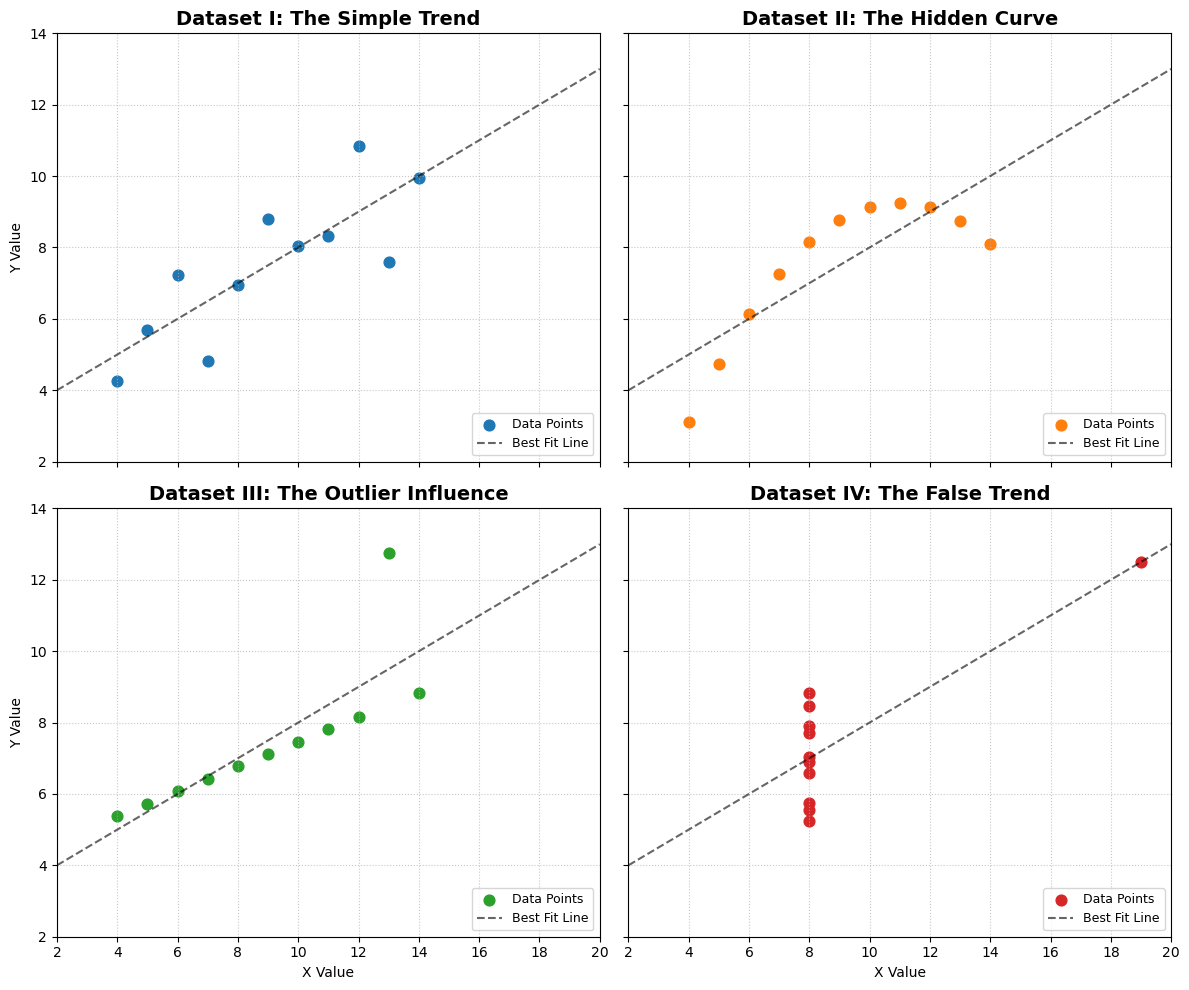

In [3]:
# Load data again and clean it
df = pd.read_excel('anscombes blog.xlsx')
df = df.iloc[:11].copy() # Keep only the first 11 rows

# Ensure all columns are numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define the four datasets
datasets = [
    (df['X'], df['Y']),
    (df['X.1'], df['Y.1']),
    (df['X.2'], df['Y.2']),
    (df['X.3'], df['Y.3'])
]

# Calculate statistics
stats_list = []
for i, (x, y) in enumerate(datasets):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    stats_list.append({
        'Dataset': f'Dataset {i+1}',
        'Mean X': x.mean(),
        'Mean Y': y.mean(),
        'Var X': x.var(),
        'Var Y': y.var(),
        'Correlation': r_value,
        'Slope': slope,
        'Intercept': intercept
    })

stats_df = pd.DataFrame(stats_list)
print(stats_df)

# Create the visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
titles = ['Dataset I: The Simple Trend', 'Dataset II: The Hidden Curve', 
          'Dataset III: The Outlier Influence', 'Dataset IV: The False Trend']

for i, (x, y) in enumerate(datasets):
    ax = axes[i // 2, i % 2]
    ax.scatter(x, y, color=colors[i], s=60, label='Data Points')
    
    # Add regression line
    slope = stats_df.iloc[i]['Slope']
    intercept = stats_df.iloc[i]['Intercept']
    line_x = np.array([2, 20])
    line_y = intercept + slope * line_x
    ax.plot(line_x, line_y, color='black', linestyle='--', alpha=0.6, label='Best Fit Line')
    
    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.set_xlim(2, 20)
    ax.set_ylim(2, 14)
    if i >= 2: ax.set_xlabel('X Value')
    if i % 2 == 0: ax.set_ylabel('Y Value')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.savefig('anscombes_quartet_comparison.png')

# Save stats to CSV for user
stats_df.to_csv('anscombes_statistics.csv', index=False)